In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_approved (1)(in).csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Data preprocessing

In [11]:
df.drop(columns=['Loan_ID'],inplace=True)

In [12]:
df.size

7368

In [13]:
## Handling null values
df.isnull().sum()

Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [14]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True) # Filling the Gender with mode since it is category

In [15]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [16]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [17]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [18]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [19]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [20]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [21]:
df['Credit_History'].fillna(0.0,inplace=True) # 1.0 and 0.0 values but normally credit scores are like (they are encoded by >650 ->1 ,<650 ->0)

In [22]:
df.isnull().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  614 non-null    object 
 1   Married                 614 non-null    object 
 2   Dependents              614 non-null    object 
 3   Education               614 non-null    object 
 4   Self_Employed           614 non-null    object 
 5   ApplicantIncome         614 non-null    int64  
 6   CoapplicantIncome       614 non-null    float64
 7   LoanAmount              614 non-null    float64
 8   Loan_Amount_Term        614 non-null    float64
 9   Credit_History          614 non-null    float64
 10  Property_Area           614 non-null    object 
 11  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [24]:
## Duplicated values
df.duplicated().sum()

0

### Visuliazation
#### Univariate

Text(0.5, 1.0, 'Gender Ratio')

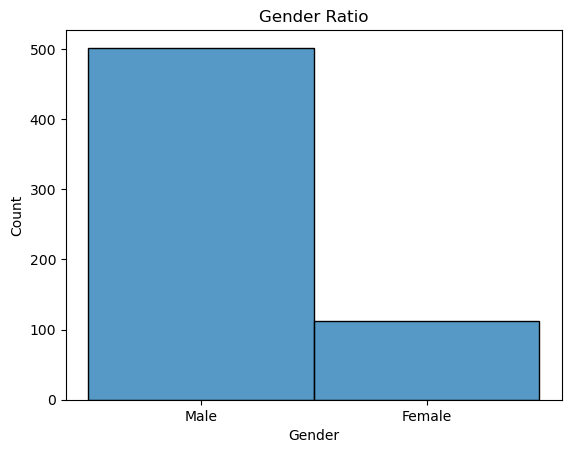

In [26]:
## Visualize 
## How will take many loans
sns.histplot(data=df,x='Gender')
plt.title('Gender Ratio')


Text(0.5, 1.0, 'Gender vs Married loan counts')

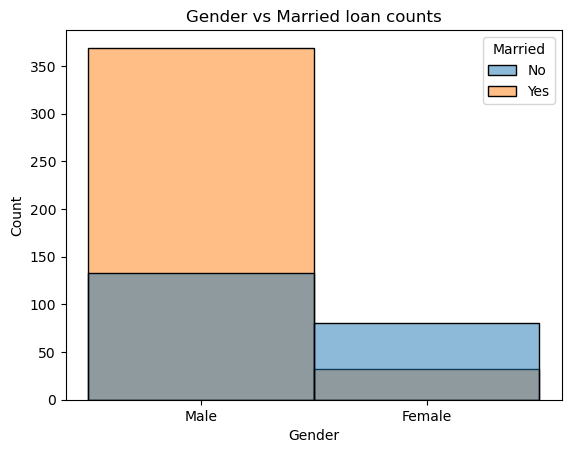

In [27]:
sns.histplot(data=df,x='Gender',hue='Married')
plt.title('Gender vs Married loan counts')

<Axes: xlabel='Gender', ylabel='Count'>

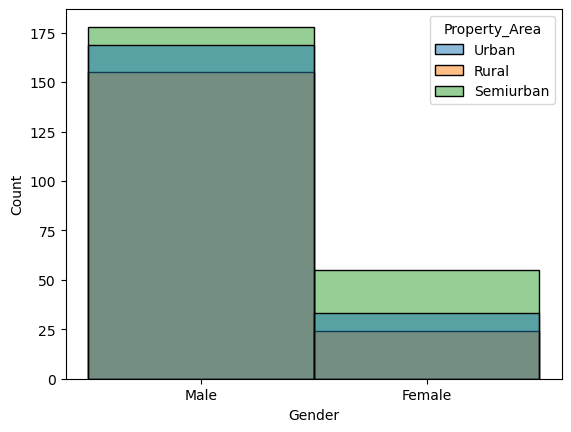

In [28]:
sns.histplot(data=df,x='Gender',hue='Property_Area')


Text(0.5, 1.0, 'Loan Approval Status')

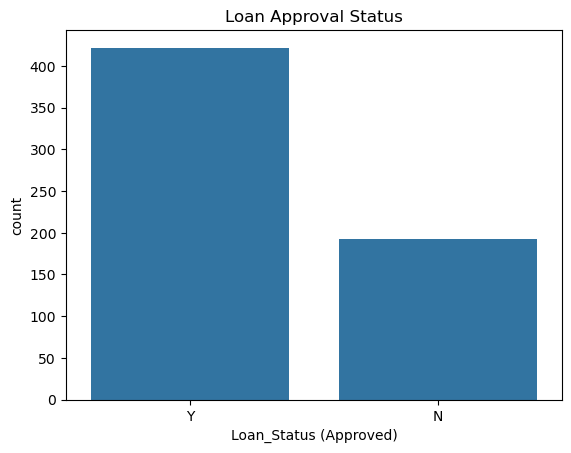

In [29]:
sns.countplot(data=df, x='Loan_Status (Approved)')
plt.title('Loan Approval Status')
# How many get Loan Approval

Text(0.5, 1.0, 'Distribution of Applicant Income')

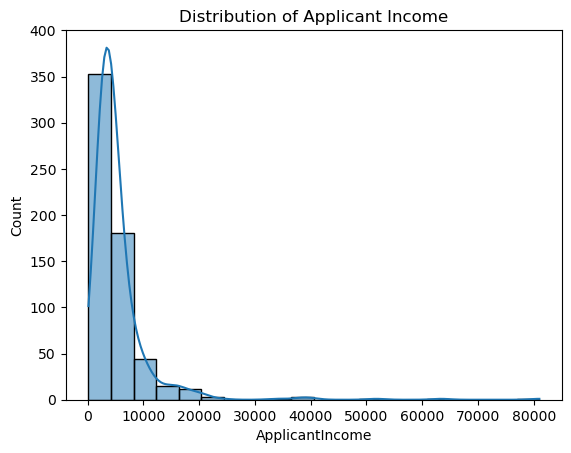

In [30]:
sns.histplot(data=df, x='ApplicantIncome',bins=20,  kde=True)
plt.title('Distribution of Applicant Income')
# Right skwed

Text(0.5, 1.0, 'Distribution of Loan Amount')

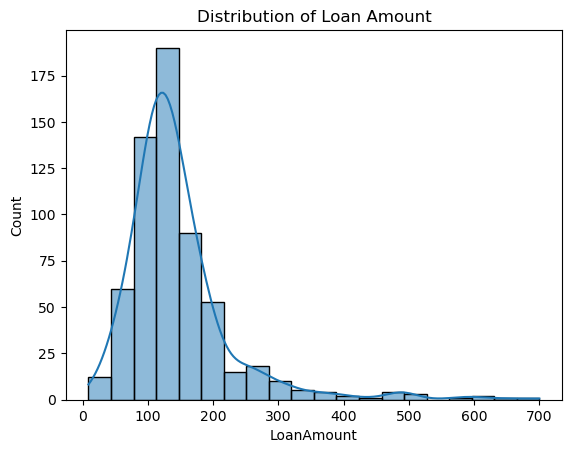

In [31]:
sns.histplot(data=df, x='LoanAmount',bins=20,  kde=True)
plt.title('Distribution of Loan Amount')

#### Bivarite Analaysis

Text(0.5, 1.0, 'Income vs Loan Approval')

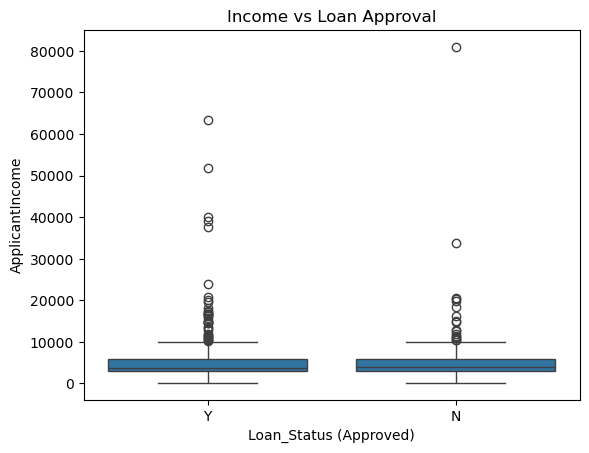

In [33]:
sns.boxplot(data=df, x='Loan_Status (Approved)', y='ApplicantIncome')
plt.title('Income vs Loan Approval')


Text(0.5, 1.0, 'Income vs Loan Amount by Credit History')

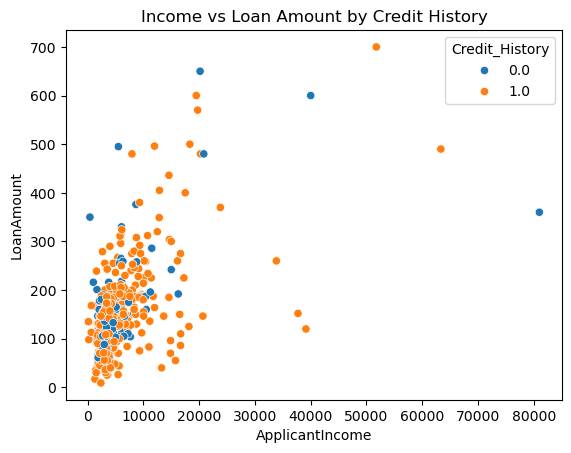

In [34]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount',hue='Credit_History')
plt.title('Income vs Loan Amount by Credit History')


Text(0.5, 1.0, 'Correlation Matrix')

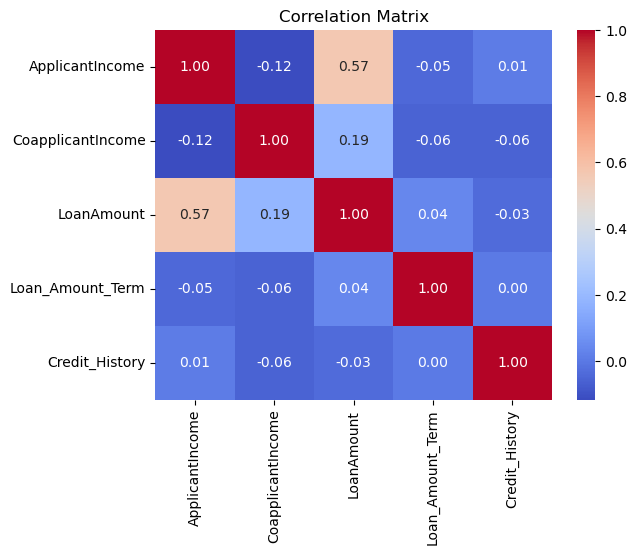

In [35]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

In [37]:
# 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.linear_model import LogisticRegression

In [38]:
## converting the types 


In [39]:
df.dtypes

Gender                     object
Married                    object
Dependents                 object
Education                  object
Self_Employed              object
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area              object
Loan_Status (Approved)     object
dtype: object

In [40]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [41]:
df['Gender']=df['Gender'].map({
    'Male':0,
    'Female':1
}) # Male=0, #Female=1

In [42]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
df['Married']=df['Married'].map({
    'Yes':0,
    'No':1
}) # yes=0,No=1

In [44]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [45]:
df['Dependents']=df['Dependents'].map({
    '0':0,
    '1':1,
    '2':2,
    '3+':3
})

In [46]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [47]:
df['Education']=df['Education'].map({
    'Graduate':0,
    'Not Graduate':1
}) # Graduate=0 ,Non Graduate=1

In [48]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
df['Self_Employed']=df['Self_Employed'].map({
    'Yes':0,
    'No':1
}) # yes=0,No=1

In [50]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [51]:
df['Property_Area']=df['Property_Area'].map({
    'Urban':0,
    'Rural':1, 
    'Semiurban':2
})
    

In [52]:
df['Loan_Status (Approved)'].unique()

array(['Y', 'N'], dtype=object)

In [53]:
df['Loan_Status (Approved)']=df['Loan_Status (Approved)'].map({
    'Y':0,
    'N':1
})

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  614 non-null    int64  
 1   Married                 614 non-null    int64  
 2   Dependents              614 non-null    int64  
 3   Education               614 non-null    int64  
 4   Self_Employed           614 non-null    int64  
 5   ApplicantIncome         614 non-null    int64  
 6   CoapplicantIncome       614 non-null    float64
 7   LoanAmount              614 non-null    float64
 8   Loan_Amount_Term        614 non-null    float64
 9   Credit_History          614 non-null    float64
 10  Property_Area           614 non-null    int64  
 11  Loan_Status (Approved)  614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [55]:
X=df.drop(columns=['Loan_Status (Approved)'])
y=df['Loan_Status (Approved)']

In [56]:
sc=StandardScaler()

In [57]:
X_scaled=sc.fit_transform(X)


In [58]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=38,test_size=0.2)

In [59]:
model=LogisticRegression()

In [60]:
model.fit(X_train,y_train)

LogisticRegression()

In [61]:
model.coef_

array([[-0.11577186,  0.33736823,  0.01616037,  0.10459668,  0.02195436,
        -0.01312727,  0.11113567,  0.14569144,  0.11002411, -0.93653478,
        -0.25428049]])

In [62]:
ypred=model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test,ypred)

0.7642276422764228